In [2]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('bank.csv', sep = ';')

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Unique values 

df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student', nan], dtype=object)

In [10]:
# Sum of unique values

df['job'].nunique()

12

In [11]:
# To check statistical summary 
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
# To check object data 
df.describe(include  = 'O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41194,41194,41194,41195,41196,41195,41195,41196,41196,41194,41196
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24934,12168,32595,21584,33957,26151,13769,8623,35563,36556


In [15]:
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [16]:
#  Treat Null values
# 1) Drop 
# 2) Fill the values with mean median mode

#  mean , median = > Numerical values 
#  mode => String or Object 

In [17]:
col_list  = list(df.columns)

In [18]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [22]:
for i in col_list:
    if df[i].dtypes == "object":
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].mean())

In [23]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [24]:
# Replace categorical column with numerical value
#  Label Encoding

In [26]:
df['y'] = np.where(df['y'] == 'yes',1,0)

In [28]:
df['y'].dtype

dtype('int32')

In [29]:
# To change the data type int to string 
df['y'] = df['y'].astype('str')

In [31]:
df['y'].dtype

dtype('O')

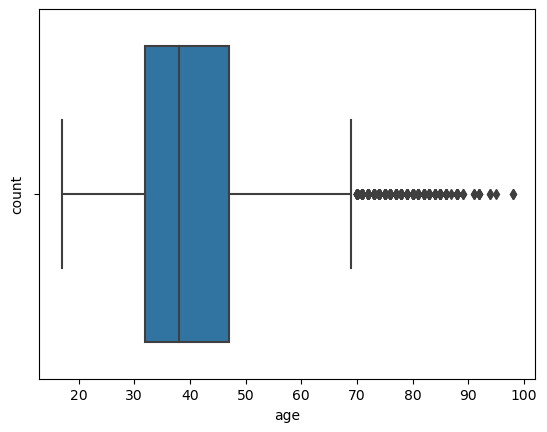

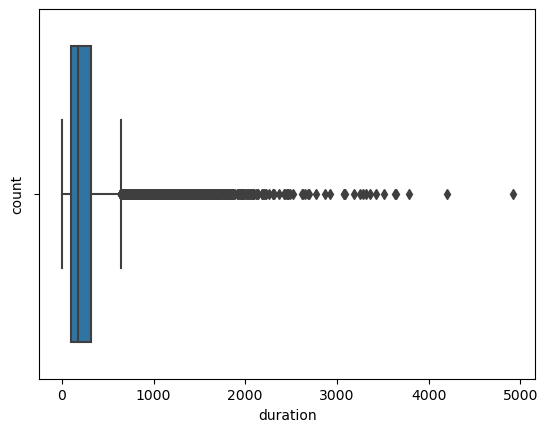

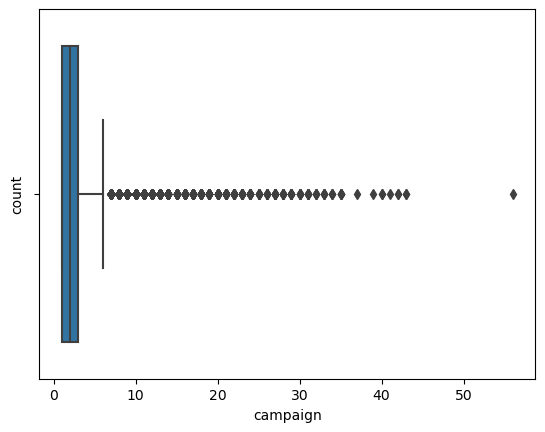

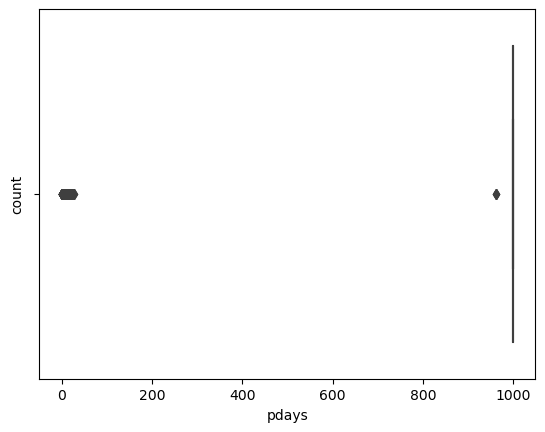

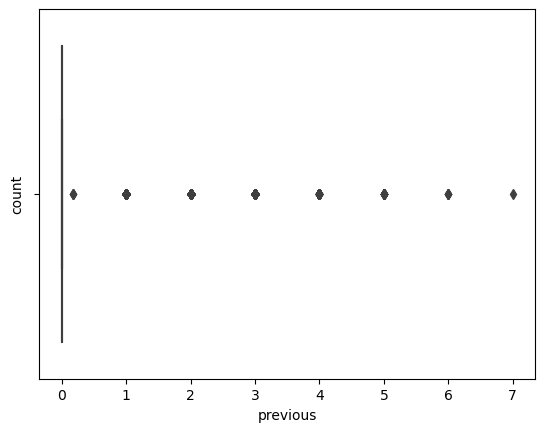

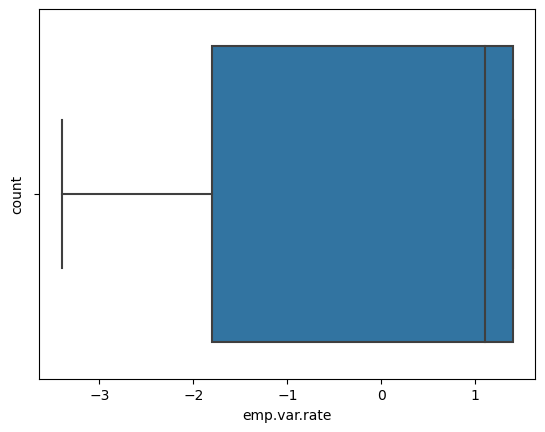

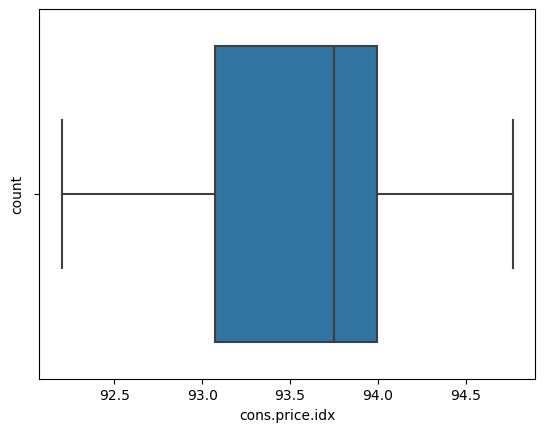

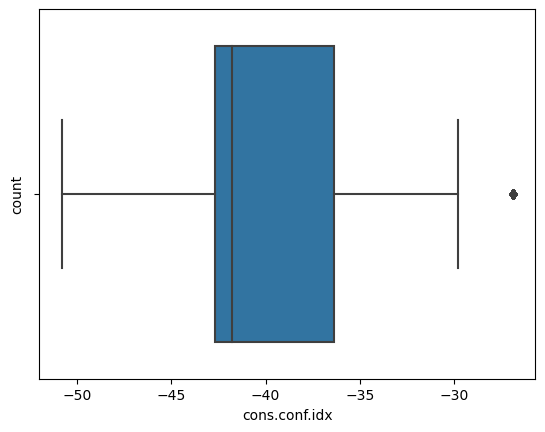

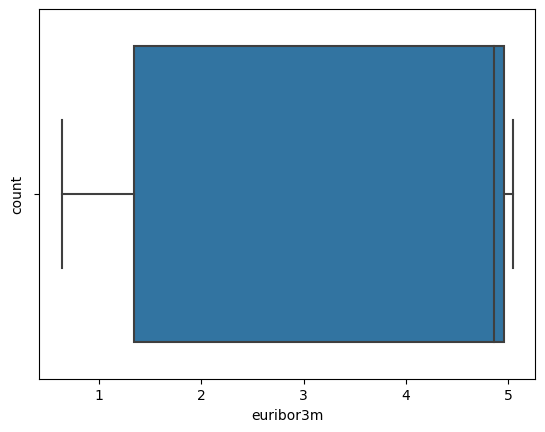

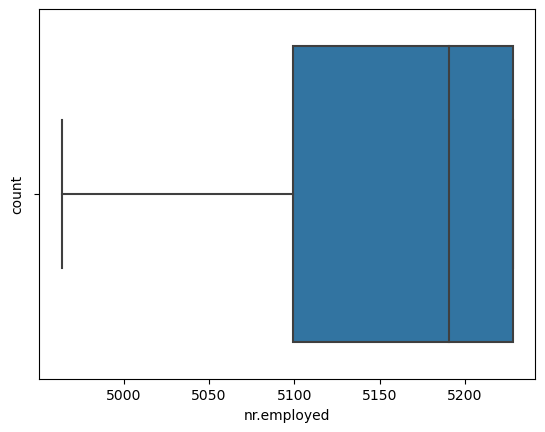

In [32]:
#  To find outliers 
#  We visualize the outliers using boxplot 

for col_name in col_list:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [33]:

#  To remove Outlier Using IQR method

In [35]:
# IQR = Q3 - Q1

# lower limit = Q1 - 1.5 * IQR
# lower limit = Q3 + 1.5 * IQR


In [36]:
#  Handling the outliers 

Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3-Q1
df = df[(df.age>=Q1-1.5*IQR) & (df.age<= Q3+1.5*IQR)]

Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)
IQR = Q3-Q1
df = df[(df.duration>=Q1-1.5*IQR) & (df.duration<= Q3+1.5*IQR)]

Q1 = df.campaign.quantile(0.25)
Q3 = df.campaign.quantile(0.75)
IQR = Q3-Q1
df = df[(df.campaign>=Q1-1.5*IQR) & (df.campaign<= Q3+1.5*IQR)]

Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['cons.conf.idx'] >= Q1 - 1.5*IQR) & (df['cons.conf.idx'] <= Q3 + 1.5*IQR)]

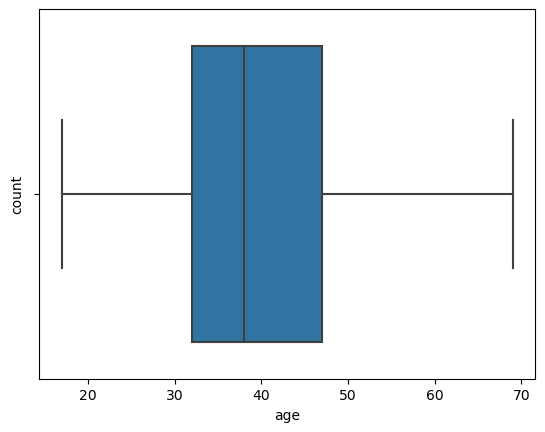

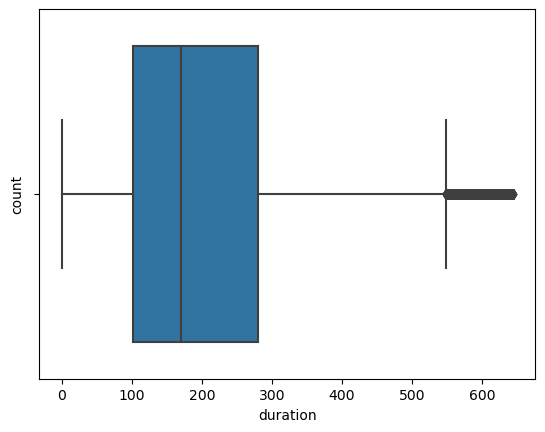

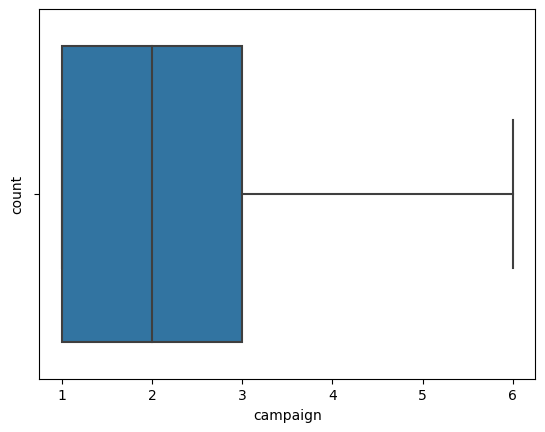

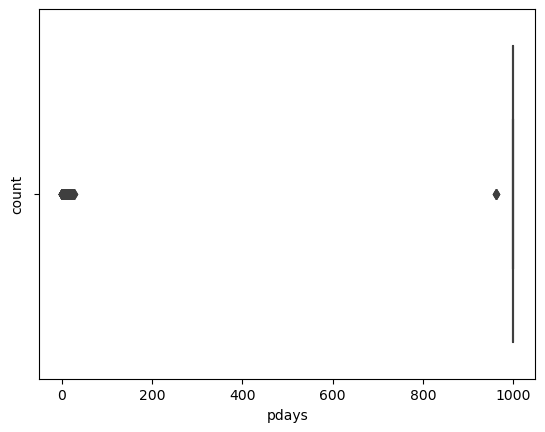

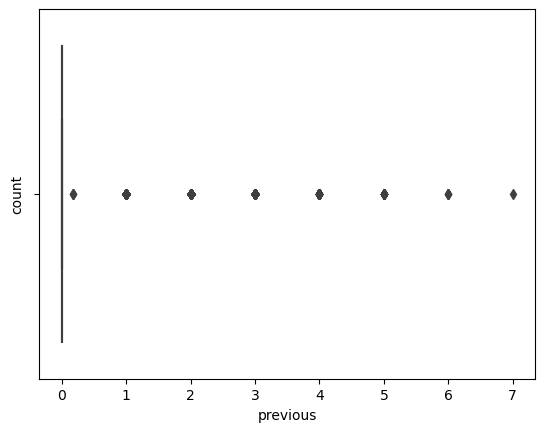

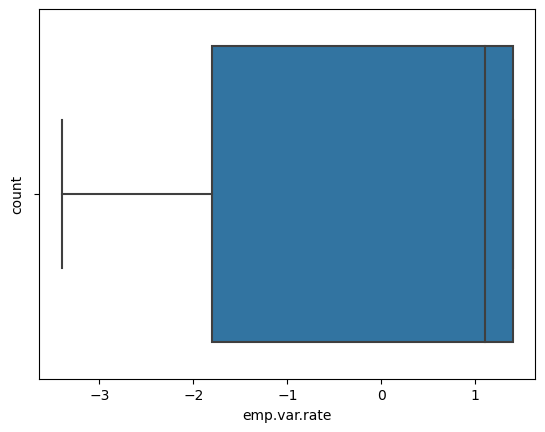

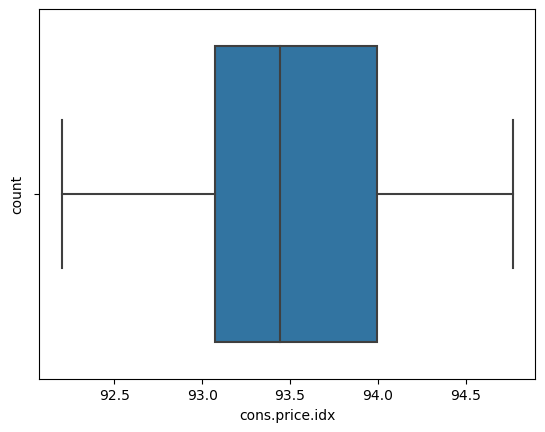

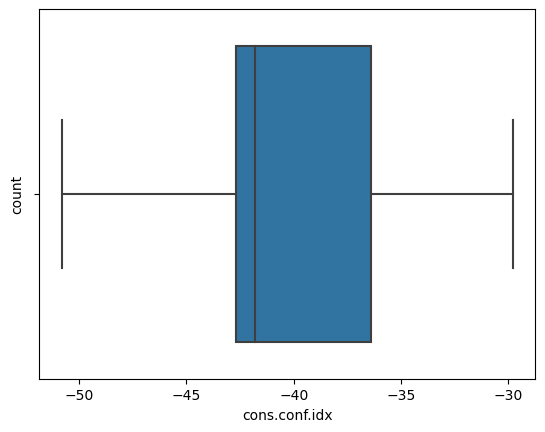

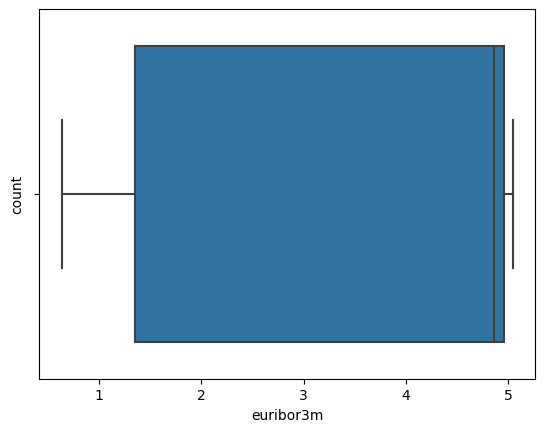

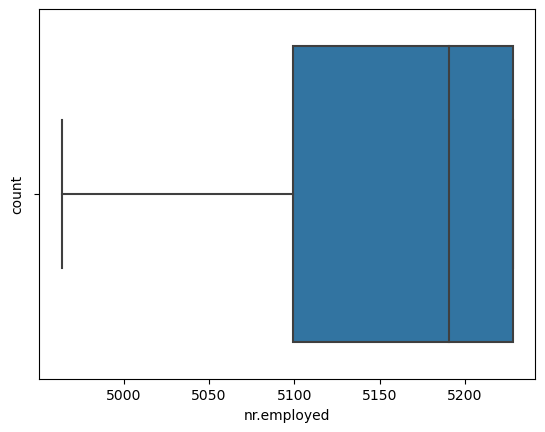

In [37]:
for col_name in col_list:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [48]:
#LabelEncoding

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    df[i]=labelencoder.fit_transform(df[i])

In [49]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,0,27,0,1,9,18,17,279,9,0
1,1,7,1,3,1,0,0,1,6,1,...,0,27,0,1,9,18,17,279,9,0
2,0,7,1,3,0,2,0,1,6,1,...,0,27,0,1,9,18,17,279,9,0
3,0,0,1,1,0,0,0,1,6,1,...,0,27,0,1,9,18,17,279,9,0
4,1,7,1,3,0,0,2,1,6,1,...,0,27,0,1,9,18,17,279,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,0,9,1,5,0,0,0,0,7,0,...,0,27,0,1,5,25,0,162,0,1
41188,0,0,1,6,0,2,0,0,6,2,...,2,26,1,1,8,13,10,252,7,0
41189,0,5,1,5,0,2,0,0,7,0,...,3,27,2,1,5,25,0,162,0,0
41191,0,0,1,6,0,2,0,0,6,2,...,2,26,1,1,8,13,10,252,7,0


In [50]:
# VIF ==>Variance Inflation Factor 
#  VIF used to remove the particular columns who are having multicolinearity in the df


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
col_list = []

for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.282305
1,job,2.101858
2,marital,5.074391
3,education,4.539266
4,default,1.386153
5,housing,2.211530
6,loan,1.207486
7,contact,3.431814
8,month,5.389483
9,day_of_week,3.093805


In [ ]:
data = data.drop(["emp.var.rate"],axis = 1)

In [70]:
col_list = []

for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.282305
1,job,2.101858
2,marital,5.074391
3,education,4.539266
4,default,1.386153
5,housing,2.211530
6,loan,1.207486
7,contact,3.431814
8,month,5.389483
9,day_of_week,3.093805


In [ ]:
df = df.drop(["euribor3m"],axis = 1)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.264937
1,job,2.082256
2,marital,4.612200
3,education,4.317282
4,default,1.375537
5,housing,2.145836
6,loan,1.203940
7,contact,2.170567
8,month,4.423940
9,day_of_week,3.029888


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.282305
1,job,2.101858
2,marital,5.074391
3,education,4.539266
4,default,1.386153
5,housing,2.211530
6,loan,1.207486
7,contact,3.431814
8,month,5.389483
9,day_of_week,3.093805


In [85]:
df = df.drop(["cons.price.idx"],axis = 1)

In [86]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,262,0,0,1,17,9,0
1,1,7,1,3,1,0,0,1,6,1,149,0,0,1,17,9,0
2,0,7,1,3,0,2,0,1,6,1,226,0,0,1,17,9,0
3,0,0,1,1,0,0,0,1,6,1,151,0,0,1,17,9,0
4,1,7,1,3,0,0,2,1,6,1,308,0,0,1,17,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,0,9,1,5,0,0,0,0,7,0,443,0,0,1,0,0,1
41188,0,0,1,6,0,2,0,0,6,2,259,2,1,1,10,7,0
41189,0,5,1,5,0,2,0,0,7,0,239,3,2,1,0,0,0
41191,0,0,1,6,0,2,0,0,6,2,259,2,1,1,10,7,0


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.281930
1,job,2.101736
2,marital,5.074390
3,education,4.538934
4,default,1.384803
5,housing,2.208395
6,loan,1.207484
7,contact,2.345085
8,month,5.327111
9,day_of_week,3.093786


In [88]:
df = df.drop(["nr.employed"],axis = 1)

In [89]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,y
0,1,3,1,0,0,0,0,1,6,1,262,0,0,1,17,0
1,1,7,1,3,1,0,0,1,6,1,149,0,0,1,17,0
2,0,7,1,3,0,2,0,1,6,1,226,0,0,1,17,0
3,0,0,1,1,0,0,0,1,6,1,151,0,0,1,17,0
4,1,7,1,3,0,0,2,1,6,1,308,0,0,1,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,0,9,1,5,0,0,0,0,7,0,443,0,0,1,0,1
41188,0,0,1,6,0,2,0,0,6,2,259,2,1,1,10,0
41189,0,5,1,5,0,2,0,0,7,0,239,3,2,1,0,0
41191,0,0,1,6,0,2,0,0,6,2,259,2,1,1,10,0


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.281930
1,job,2.101736
2,marital,5.074390
3,education,4.538934
4,default,1.384803
5,housing,2.208395
6,loan,1.207484
7,contact,2.345085
8,month,5.327111
9,day_of_week,3.093786


In [95]:
#Model Building

In [96]:
Ind_features = list(data.columns)
Ind_features.remove('y')

x = data[Ind_features]
y = data['y'] 

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state= 42)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
logReg = LogisticRegression()

In [101]:
# Train Our data
logReg.fit(x_train , y_train)

LogisticRegression()

In [102]:
# Predict

y_pred = logReg.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9353325753268903

In [104]:
confusion_matrix(y_test,y_pred)

array([[6374,  105],
       [ 350,  207]], dtype=int64)